# 1. Download&nbsp;Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# For Google Colab
from pathlib import Path

def read_imdb_split(split_dir):
    split_dir = Path(split_dir)
    texts = []
    labels = []
    for label_dir in ["pos", "neg"]:
        for text_file in (split_dir/label_dir).iterdir():
            texts.append(text_file.read_text())
            labels.append(0 if label_dir == "neg" else 1)

    return texts, labels

train_texts, train_labels = read_imdb_split('/content/drive/Shareddrives/NLP/NLP Assignment/dataset/train')
test_texts, test_labels = read_imdb_split('/content/drive/Shareddrives/NLP/NLP Assignment/dataset/test')

In [ ]:
# For local machine (e.g. Jupyter Notebook) 
# import os

# def read_imdb_split(split_dir):
#     texts = []
#     labels = []
#     for label_dir in ["pos", "neg"]:
#         for filename in os.listdir(split_dir + '/' + label_dir):
#             if filename.endswith(".txt"):
#                 f = open(split_dir + '/' + label_dir + '/' + filename, "r", encoding= "utf-8")
#                 texts.append(f.read())
#                 labels.append(0 if label_dir == "neg" else 1)

#     return texts, labels

# train_texts, train_labels = read_imdb_split('dataset/train')
# test_texts, test_labels = read_imdb_split('dataset/test')

In [ ]:
!pip install ktrain
!pip install seaborn
!pip install plotly
!pip install -U spacy
!python -m spacy download en_core_web_sm
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download("stopwords")
!pip install cleantext
!pip install emoji
!pip install contractions

     |████████████████████████████████| 25.3 MB 106 kB/s 
     |████████████████████████████████| 6.8 MB 47.9 MB/s 
     |████████████████████████████████| 981 kB 37.1 MB/s 
     |████████████████████████████████| 263 kB 56.3 MB/s 
     |████████████████████████████████| 1.9 MB 52.7 MB/s 
     |████████████████████████████████| 1.2 MB 39.4 MB/s 
     |████████████████████████████████| 468 kB 56.4 MB/s 
     |████████████████████████████████| 3.3 MB 69.8 MB/s 
     |████████████████████████████████| 895 kB 44.1 MB/s 
  Created wheel for ktrain: filename=ktrain-0.27.3-py3-none-any.whl size=25283131 sha256=fb5696f9e2e88ecfa0fe8a7545752de5f2332ccb5209de8a6e77487635a70cb4
  Stored in directory: /root/.cache/pip/wheels/3c/ef/e1/7da805d8a5944e8a3ac0553831d832c00b1800b848939849cb
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9929 sha256=643c6950d72726c44b8bbf7732af1769ae2c26763ae82349a5487c28f8cb21b0
  Stored in directory: /root/.cache/pip/wheels/f5/ac/f1/4e13d7aff

# 2. Simple Data Exploration

In [ ]:
print(f"train_texts length: {len(train_texts)}")
print(f"train_labels length: {len(train_labels)}")
print()
print(f"test_texts length: {len(test_texts)}")
print(f"test_labels length: {len(test_labels)}")

train_texts length: 25000
train_labels length: 25000

test_texts length: 25000
test_labels length: 25000


## 2.1 Combine training features & training labels

In [ ]:
import pandas as pd
train_texts_df = pd.DataFrame(train_texts, columns=["review"])
train_labels_df = pd.DataFrame(train_labels, columns=['sentiment'])

# Combine train and test data
train_df = pd.concat([train_texts_df, train_labels_df], axis=1, join='inner')
train_df.head()

,review,sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,"If you like adult comedy cartoons, like South ...",1
2,"I'm a male, not given to women's movies, but t...",1
3,Scott Bartlett's 'OffOn' is nine minutes of pu...,1
4,I liked the film. Some of the action scenes we...,1


## 2.2 Combine testing features & testing labels

In [ ]:
test_texts_df = pd.DataFrame(test_texts, columns=["review"])
test_labels_df = pd.DataFrame(test_labels, columns=['sentiment'])

test_df = pd.concat([test_texts_df, test_labels_df], axis=1, join='inner')
test_df.head()

,review,sentiment
0,I went and saw this movie last night after bei...,1
1,My boyfriend and I went to watch The Guardian....,1
2,If you had asked me how the movie was througho...,1
3,The finest short I've ever seen. Some commenta...,1
4,I was fortunate to attend the London premier o...,1


## 2.3 Combine train data & test data

In [ ]:
df = train_df.append(test_df, ignore_index = True)

## 2.4 Check the unique values of target column

In [ ]:
df['sentiment'].unique()

array([1, 0])

## 2.5 An overview of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


## 2.6 Check missing values

In [ ]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

## 2.7 Check dataset balancing

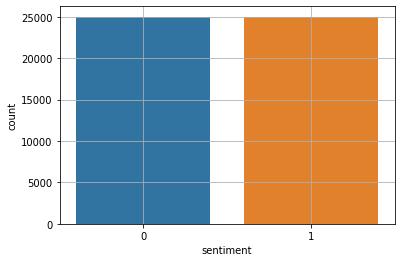

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Check whether the data is imbalanced or balanced
sns.countplot(x=df['sentiment'], )
plt.grid()

As shown in the diagram, our dataset is **balanced** where the number of **neg (0)** comments are **similar** to **pos (1)** comments

# 3. Install packages and do data cleaning

In [ ]:
# !pip install -U spacy
# !python -m spacy download en_core_web_sm
# !pip install nltk
# !pip install cleantext
# !pip install emoji

## 3.1 Do testing on cleaning a random sentence

In [ ]:
# Example of cleaning a sample sentence
import cleantext
import nltk
# nltk.download('punkt')
# nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
import re
import emoji

sentence = "receiving Hi 332@dcej:fcsCC   D is I we   kNN   Would not having👻    Shall we forgive them if they did something bad"
sentence = cleantext.clean(sentence, all=False, extra_spaces=True, stopwords=True, lowercase=True, punct=True, stp_lang='english')

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
doc = nlp(sentence)
sentence = " ".join([token.lemma_ for token in doc])
sentence = re.sub(emoji.get_emoji_regexp(), r"", sentence)

print(sentence)

receive hi 332dcejfcscc knn would have  shall forgive something bad


In [ ]:
# Remove contractions
import contractions

sampletext = '''She'd like to know how i'd done that!
she's going to the park and i don't think i'll be home for dinner. let's go
theyre going to the zoo and she'll be home for dinner. she'd wait.'''
  
cleaned = contractions.fix(sampletext)
print (cleaned)

she would like to know how I would done that!
she is going to the park and i do not think I will be home for dinner. let us go
they are going to the zoo and she will be home for dinner. she would wait.


In [ ]:
# Remove stopwaords except 'no', 'nor', 'not'
sample_text = "She is not happy with the result that she achieved. "
 
stop_words = set(stopwords.words('english'))
stop_words.remove('no')
stop_words.remove('nor')
stop_words.remove('not')
    
word_tokens = word_tokenize(sample_text)
text = " ".join([w for w in word_tokens if not w.lower() in stop_words])

print(text)

not happy result achieved .


## 3.2 Create text cleaning functions

In [ ]:
import cleantext
import nltk
# nltk.download("stopwords")
# nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy # python -m spacy download en_core_web_sm
import re
import emoji
import contractions

def cleaned_review(text):
    
    # Removing html tags
    text = re.sub('<.*?>', '', text)

    # Removing links
    text = re.sub('(?i)\b((?:[a-z][\w-]+:(?:/{1,3}|[a-z0-9%])|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', text)

    # Lower case
    text = text.lower()
    
    # Removing contractions
    text = contractions.fix(text)
    
    # Removing emojis
    text = re.sub(emoji.get_emoji_regexp(), r"", text)
    
    # Remove special characters and emojis
    text=re.sub('\x91The','The',text)
    text=re.sub('\x97','',text)
    text=re.sub('\x84The','The',text)
    text=re.sub('\uf0b7','',text)
    text=re.sub('¡¨','',text)
    text=re.sub('\x95','',text)
    text=re.sub('\x8ei\x9eek','',text)
    text=re.sub('\xad','',text)
    text=re.sub('\x84bubble','bubble',text)
    
    # Removing extra spaces and punctuations
    text = cleantext.clean(text, all=False, extra_spaces=True, lowercase=True, punct=True)

    return text

In [ ]:
def lemmatized_stopwords(text):

    # Removing, stopwords
    stop_words = set(stopwords.words('english'))
    stop_words.remove('no')
    stop_words.remove('nor')
    stop_words.remove('not')
    
    word_tokens = word_tokenize(text)
    
    text = " ".join([w for w in word_tokens if not w.lower() in stop_words])
    
    doc = nlp(text)
    text = " ".join([token.lemma_ for token in doc])
    
    return text

### References

https://stackoverflow.com/questions/63633534/is-it-necessary-to-do-stopwords-removal-stemming-lemmatization-for-text-classif

# 4. Do text cleaning

In [ ]:
df['cleaned_bert_review'] = df['review'].apply(cleaned_review)
df.head()

,review,sentiment,cleaned_bert_review
0,Bromwell High is a cartoon comedy. It ran at t...,1,bromwell high is a cartoon comedy it ran at th...
1,"If you like adult comedy cartoons, like South ...",1,if you like adult comedy cartoons like south p...
2,"I'm a male, not given to women's movies, but t...",1,i am a male not given to womens movies but thi...
3,Scott Bartlett's 'OffOn' is nine minutes of pu...,1,scott bartletts offon is nine minutes of pure ...
4,I liked the film. Some of the action scenes we...,1,i liked the film some of the action scenes wer...


In [ ]:
# Use spaCy for text lemmatization
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

df['cleaned_review'] = df['cleaned_bert_review'].apply(lemmatized_stopwords)
df.head()

,review,sentiment,cleaned_bert_review,cleaned_review
0,Bromwell High is a cartoon comedy. It ran at t...,1,bromwell high is a cartoon comedy it ran at th...,bromwell high cartoon comedy run time program ...
1,"If you like adult comedy cartoons, like South ...",1,if you like adult comedy cartoons like south p...,like adult comedy cartoon like south park near...
2,"I'm a male, not given to women's movies, but t...",1,i am a male not given to womens movies but thi...,male not give women movie really well do speci...
3,Scott Bartlett's 'OffOn' is nine minutes of pu...,1,scott bartletts offon is nine minutes of pure ...,scott bartletts offon nine minute pure crazine...
4,I liked the film. Some of the action scenes we...,1,i liked the film some of the action scenes wer...,like film action scene interesting tense well ...


# 5. See the result

In [ ]:
sentiment_df = df['sentiment']
df.drop('sentiment', inplace=True, axis=1)
df['sentiment'] = sentiment_df
df.head()

,review,cleaned_bert_review,cleaned_review,sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,bromwell high is a cartoon comedy it ran at th...,bromwell high cartoon comedy run time program ...,1
1,"If you like adult comedy cartoons, like South ...",if you like adult comedy cartoons like south p...,like adult comedy cartoon like south park near...,1
2,"I'm a male, not given to women's movies, but t...",i am a male not given to womens movies but thi...,male not give women movie really well do speci...,1
3,Scott Bartlett's 'OffOn' is nine minutes of pu...,scott bartletts offon is nine minutes of pure ...,scott bartletts offon nine minute pure crazine...,1
4,I liked the film. Some of the action scenes we...,i liked the film some of the action scenes wer...,like film action scene interesting tense well ...,1


# 6. Store the result in CSV file

In [ ]:
df.to_csv (r'cleaned_IMDB.csv', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7727c1dc-fee8-4f0f-8766-37582a551b80' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>